In [1]:
# import PyTorch
import torch
# neural nets
import torch.nn as nn
# activation and pooling layers
import torch.nn.functional as F
# optimizer
import torch.optim as optim

In [2]:
# import sphere data

#import packages
from PIL import Image
import os

#define path
path = "/Users/maryclaremartin/Documents/Github/Research-Fall-2022/cali_camera_data"
dir_list = os.listdir(path)

#empty array for image names
image_names = []

#add image names from directory to a list
for image in dir_list:
    image_names.append(image)

#sort image titles
image_names = sorted(image_names)


In [3]:
image_names

['1000_gau.png',
 '1000_img.png',
 '1000_seg.png',
 '1001_gau.png',
 '1001_img.png',
 '1001_seg.png',
 '1002_gau.png',
 '1002_img.png',
 '1002_seg.png',
 '1003_gau.png',
 '1003_img.png',
 '1003_seg.png',
 '1005_gau.png',
 '1005_img.png',
 '1005_seg.png',
 '1006_gau.png',
 '1006_img.png',
 '1006_seg.png',
 '1007_gau.png',
 '1007_img.png',
 '1007_seg.png',
 '1008_gau.png',
 '1008_img.png',
 '1008_seg.png',
 '1009_gau.png',
 '1009_img.png',
 '1009_seg.png',
 '1010_gau.png',
 '1010_img.png',
 '1010_seg.png',
 '1011_gau.png',
 '1011_img.png',
 '1011_seg.png',
 '1012_gau.png',
 '1012_img.png',
 '1012_seg.png',
 '1014_gau.png',
 '1014_img.png',
 '1014_seg.png',
 '1015_gau.png',
 '1015_img.png',
 '1015_seg.png',
 '1016_gau.png',
 '1016_img.png',
 '1016_seg.png',
 '1017_gau.png',
 '1017_img.png',
 '1017_seg.png',
 '1018_gau.png',
 '1018_img.png',
 '1018_seg.png',
 '1019_gau.png',
 '1019_img.png',
 '1019_seg.png',
 '1020_gau.png',
 '1020_img.png',
 '1020_seg.png',
 '1021_gau.png',
 '1021_img.png

In [4]:
#create array for images, segmentation images
images = []
seg_images = []

for image in image_names:
    if "img" in image:
        images.append(Image.open(os.path.join(path,image)))
    elif "seg" in image:
        seg_images.append(Image.open(os.path.join(path,image)))

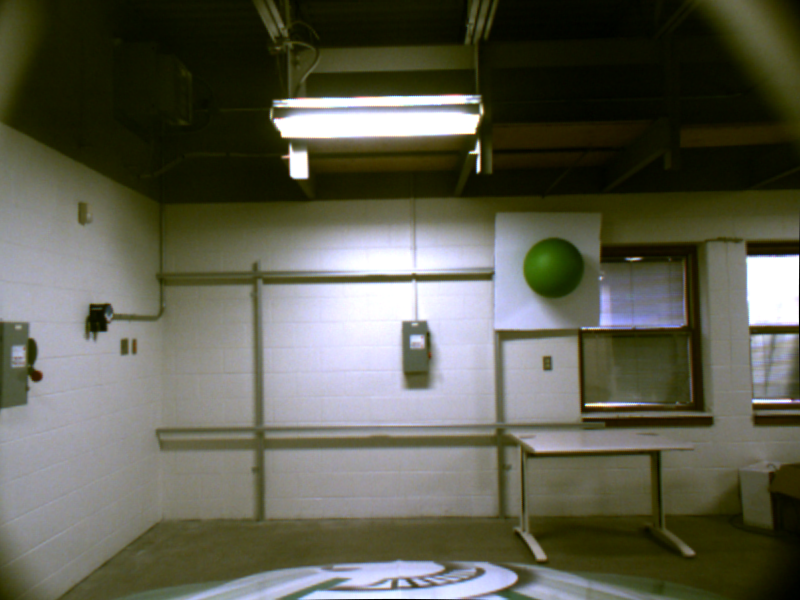

In [5]:
images[0]

In [6]:
#import packages
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

In [7]:
#define dataset
class sphereDataset(Dataset):
    def __init__(self, seg_images, images, transform=transforms.ToTensor(), target_transform=transforms.ToTensor()):
        self.seg_images = seg_images
        self.images = images
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.seg_images)

    def __getitem__(self, idx):
        image = images[idx]
        seg = seg_images[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            seg = self.target_transform(seg)
        return image, seg

In [8]:
#define dataset
sphereDataset = sphereDataset(seg_images, images)

In [9]:
#define dataloader
sphereDataLoader = DataLoader(sphereDataset, batch_size = 5, shuffle = False)

In [10]:
import pytorch_lightning as pl

In [22]:
class singleLayer(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Sequential(nn.Conv2d(3,1,5), nn.ReLU())

    def forward(self, x):
        return self.l1(x)
    

In [23]:
class BasicNet(pl.LightningModule):
    def __init__(self, singleLayer):
        super().__init__()
        self.singleLayer = singleLayer

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        image, seg = batch
        image = image.view(image.size(0), -1)
        output = self.singleLayer(image)
        loss = F.cross_entropy(output, seg)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [24]:
# model
myModel = BasicNet(singleLayer)

# train model
trainer = pl.Trainer()
trainer.fit(model=myModel, train_dataloaders=sphereDataLoader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /Users/maryclaremartin/Documents/GitHub/Research-Fall-2022/lightning_logs


ValueError: optimizer got an empty parameter list

In [ ]:
# start with PyTorch Lightning on MNIST